In [173]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# For Visualization
sns.set_style("darkgrid")
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk")
%matplotlib inline

In [8]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

In [7]:
# For time stamps
from datetime import datetime


In [43]:
#cosmetic stocks
#ticker symbols:Estee Lauder, LOreal,Revlon,Shiseido,E.L.F,COTY
 cosmetics_symbol = ['EL','LRLCY','REV','SSDOY','ELF','COTY']

In [44]:
# Set time line as one year beforehead from today
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

cosmetics = {}
for symbol in cosmetics_symbol:
    cosmetics[symbol] = DataReader(symbol,'yahoo',start,end)

In [46]:
cosmetics['EL'].describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,144.697240,141.741960,143.272080,143.197960,2.069094e+06,142.427423
std,11.144038,11.466009,11.309305,11.390331,1.102597e+06,11.522820
min,125.360001,121.470001,122.550003,122.459999,7.121000e+05,122.123398
25%,136.990005,133.782505,135.754997,135.222496,1.425900e+06,134.211201
50%,142.864998,140.105003,141.904999,141.504997,1.770450e+06,140.669327
75%,152.737499,149.432503,151.082500,151.779995,2.394875e+06,150.490074
max,171.389999,169.479996,170.720001,170.330002,1.052130e+07,170.330002


In [47]:
cosmetics['EL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-04-23 to 2019-04-18
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


In [48]:
list_cosmetics = list(cosmetics.values())

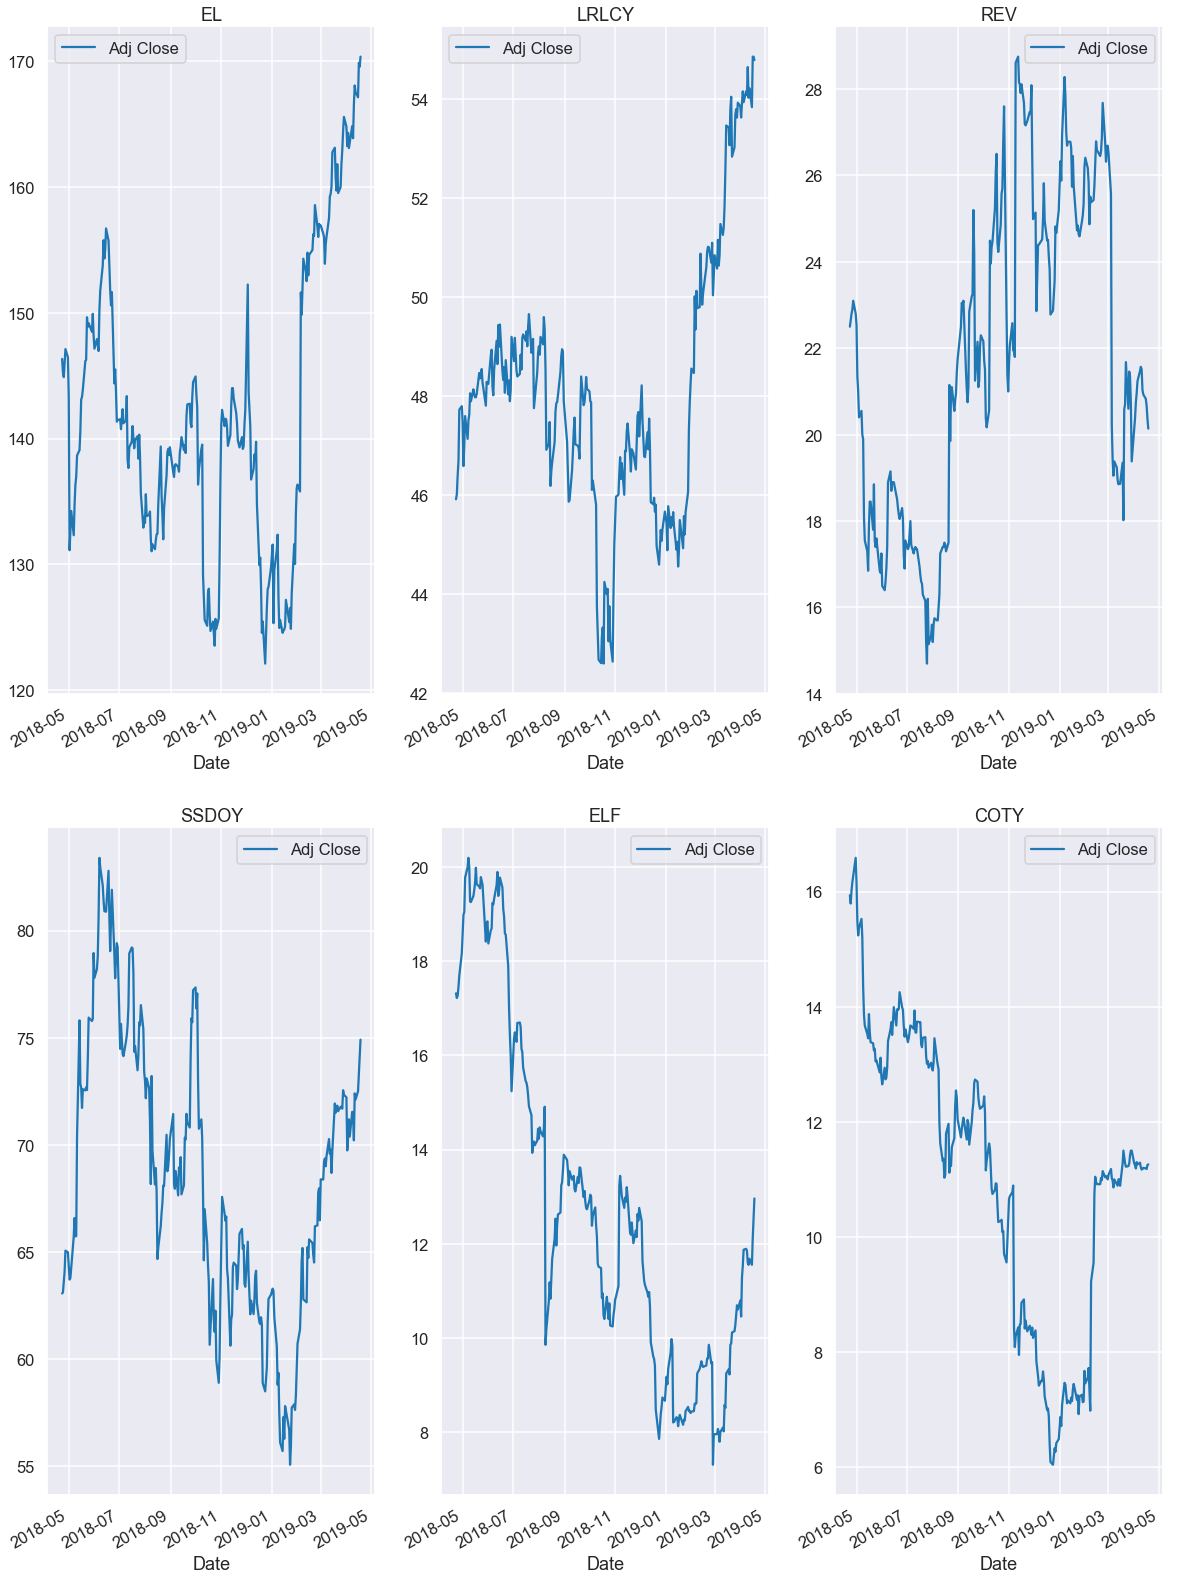

In [64]:
fig = plt.figure()
fig.ylim=(0,100)
for cos_df,num,sym in zip(list_cosmetics, range(1,7),cosmetics_symbol):
    ax = fig.add_subplot(2,3,num)
    cos_df['Adj Close'].plot(title=sym, ax=ax, legend=True,figsize=(20,30))
    #cos.plot(x="Date",y =['y1','y2'], title=c, ax=ax, legend=False)

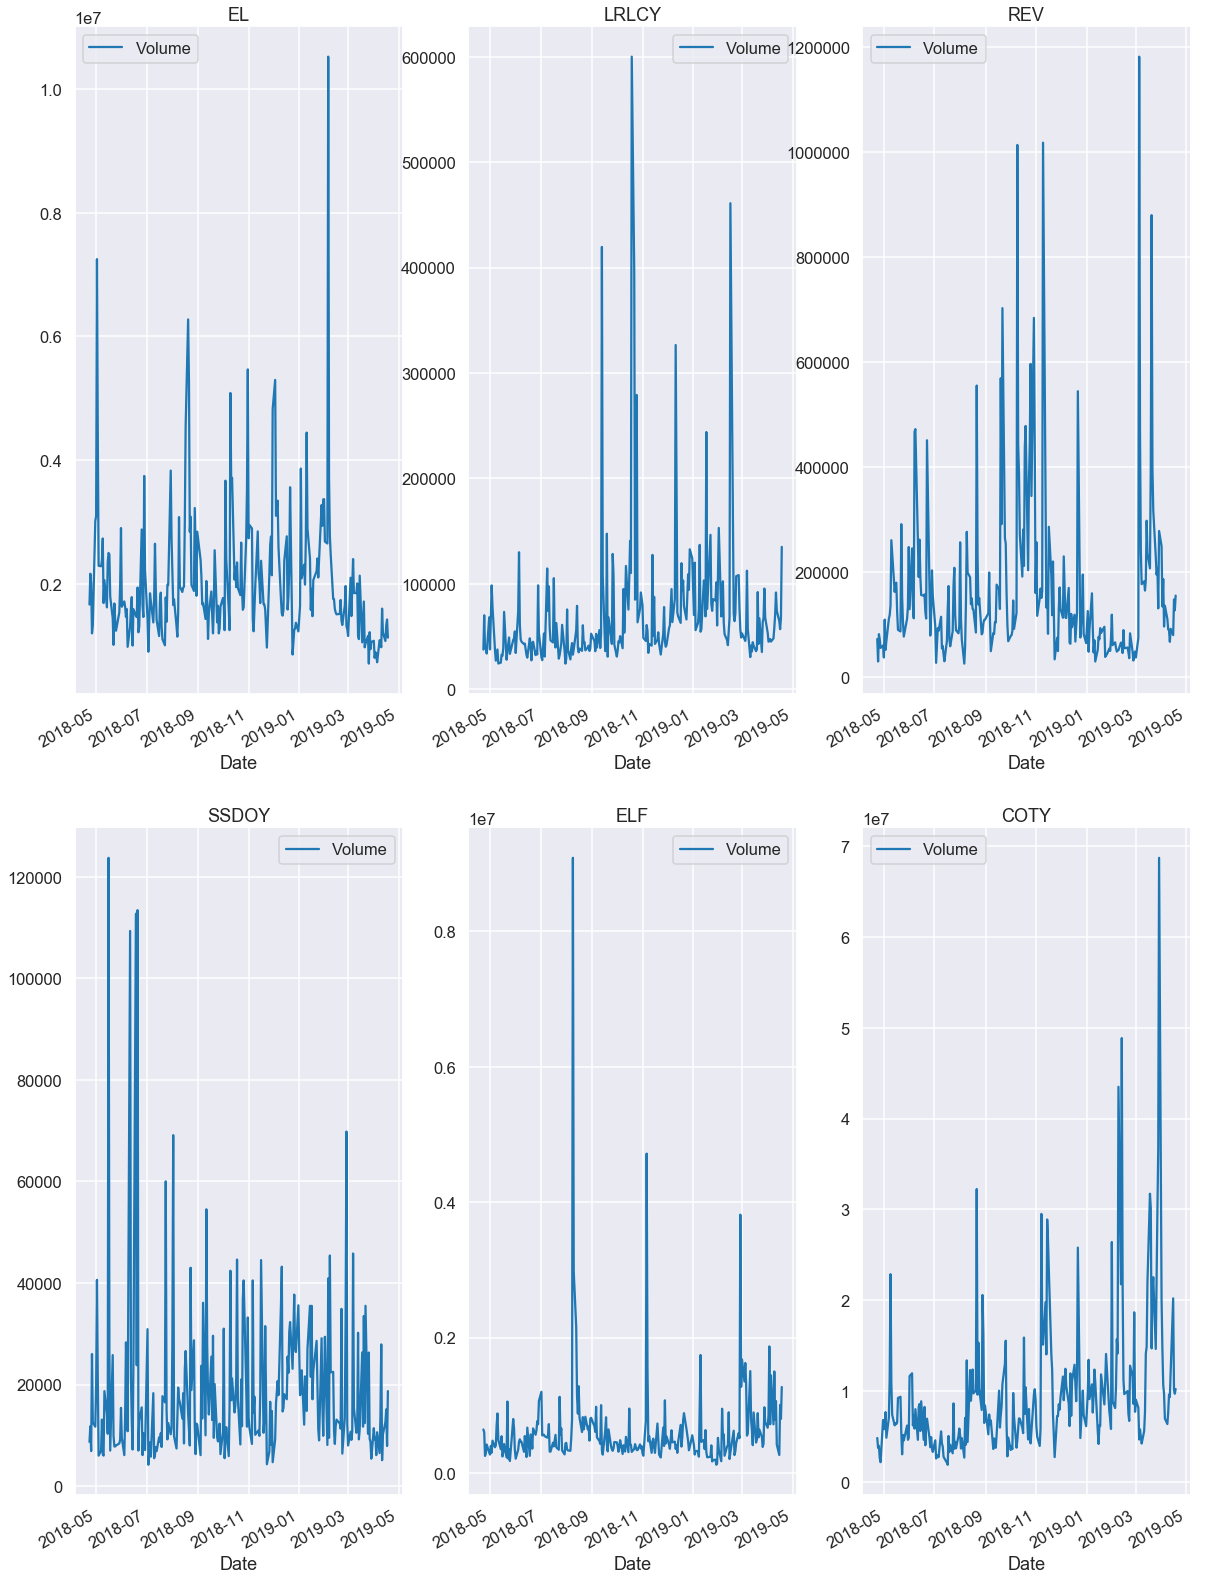

In [91]:
fig = plt.figure()
fig.ylim=(0,100)
for cos_df,num,sym in zip(list_cosmetics, range(1,7),cosmetics_symbol):
    ax = fig.add_subplot(2,3,num)
    cos_df['Volume'].plot(title=sym, ax=ax, legend=True,figsize=(20,30))
    #cos.plot(x="Date",y =['y1','y2'], title=c, ax=ax, legend=False)


caculate the moving average for the stock

In [69]:
#several moving averages
moving_average_day = [10,20,50]
for ma in moving_average_day:
    column_name = "MA for %s days" %(str(ma))
    for sym in cosmetics_symbol:
        cosmetics[sym][column_name] = cosmetics[sym]['Adj Close'].rolling(ma).mean()

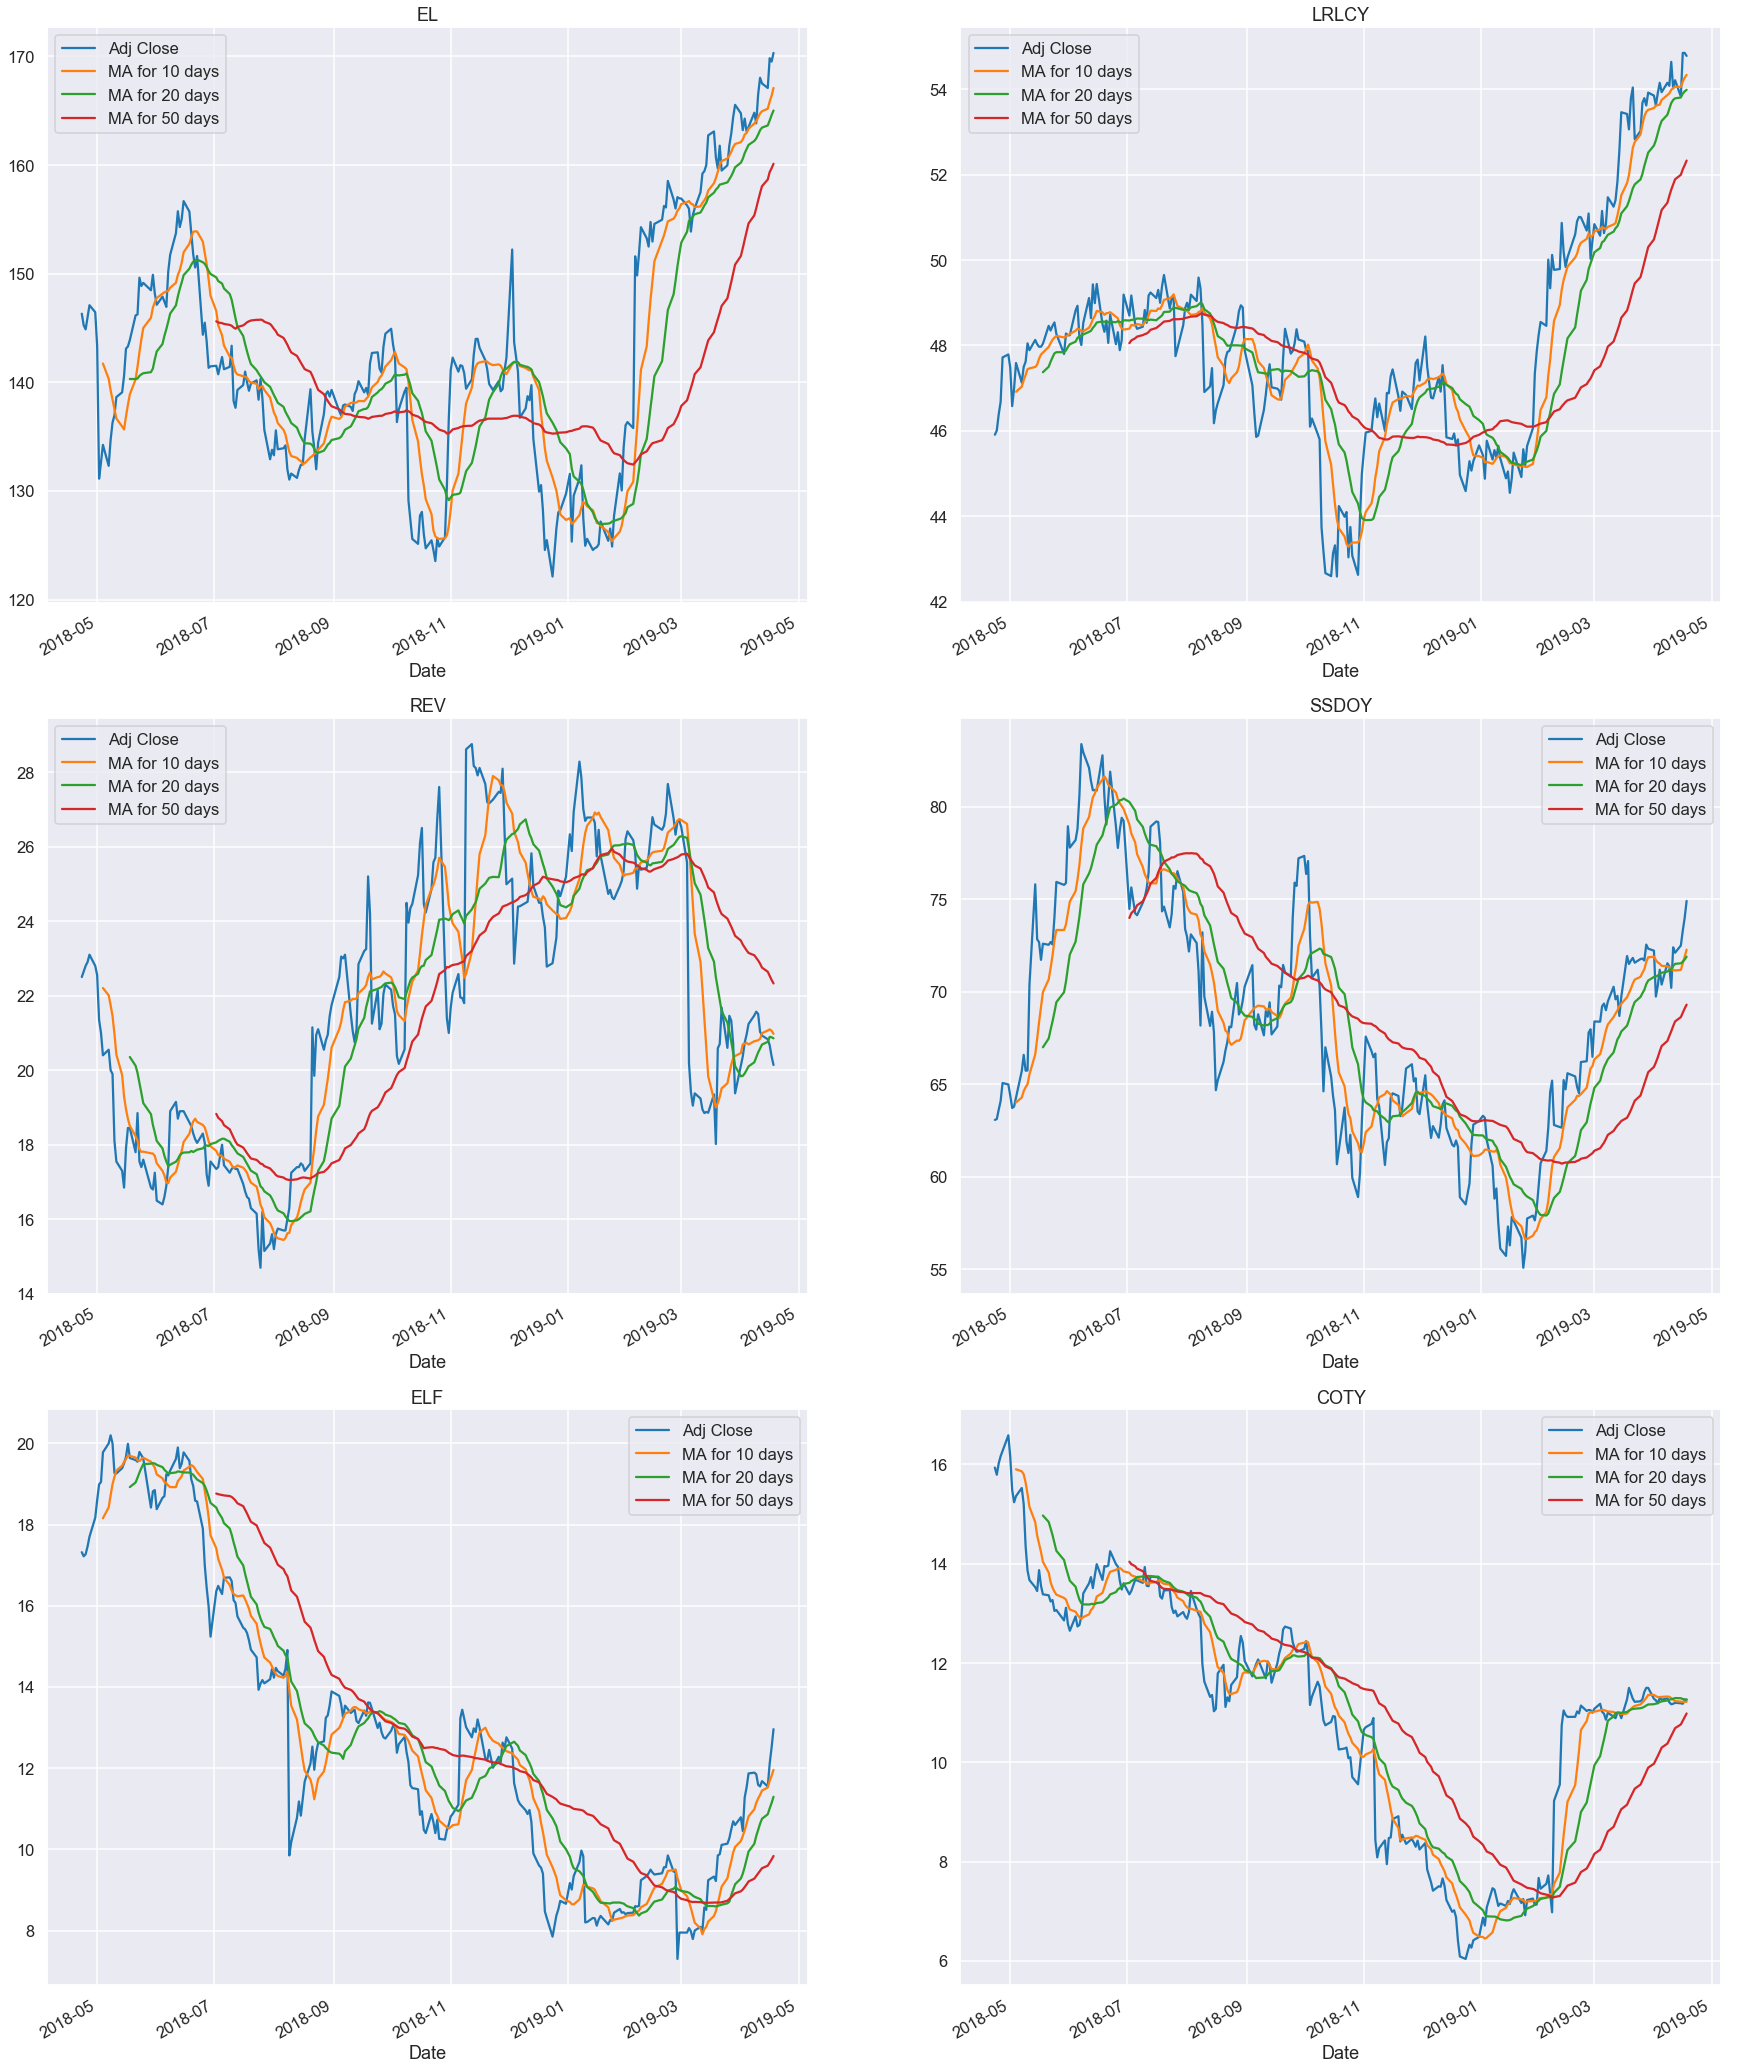

In [74]:
list_cosmetics = list(cosmetics.values())
fig = plt.figure()
for cos_df,num,sym in zip(list_cosmetics, range(1,7),cosmetics_symbol):
    ax = fig.add_subplot(3,2,num)
    cos_df[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(title=sym, ax=ax, legend=True,figsize=(30,40))

daily return analysis

In [75]:
for sym in cosmetics_symbol:
    cosmetics[sym]['Daily Return'] = cosmetics[sym]['Adj Close'].pct_change()

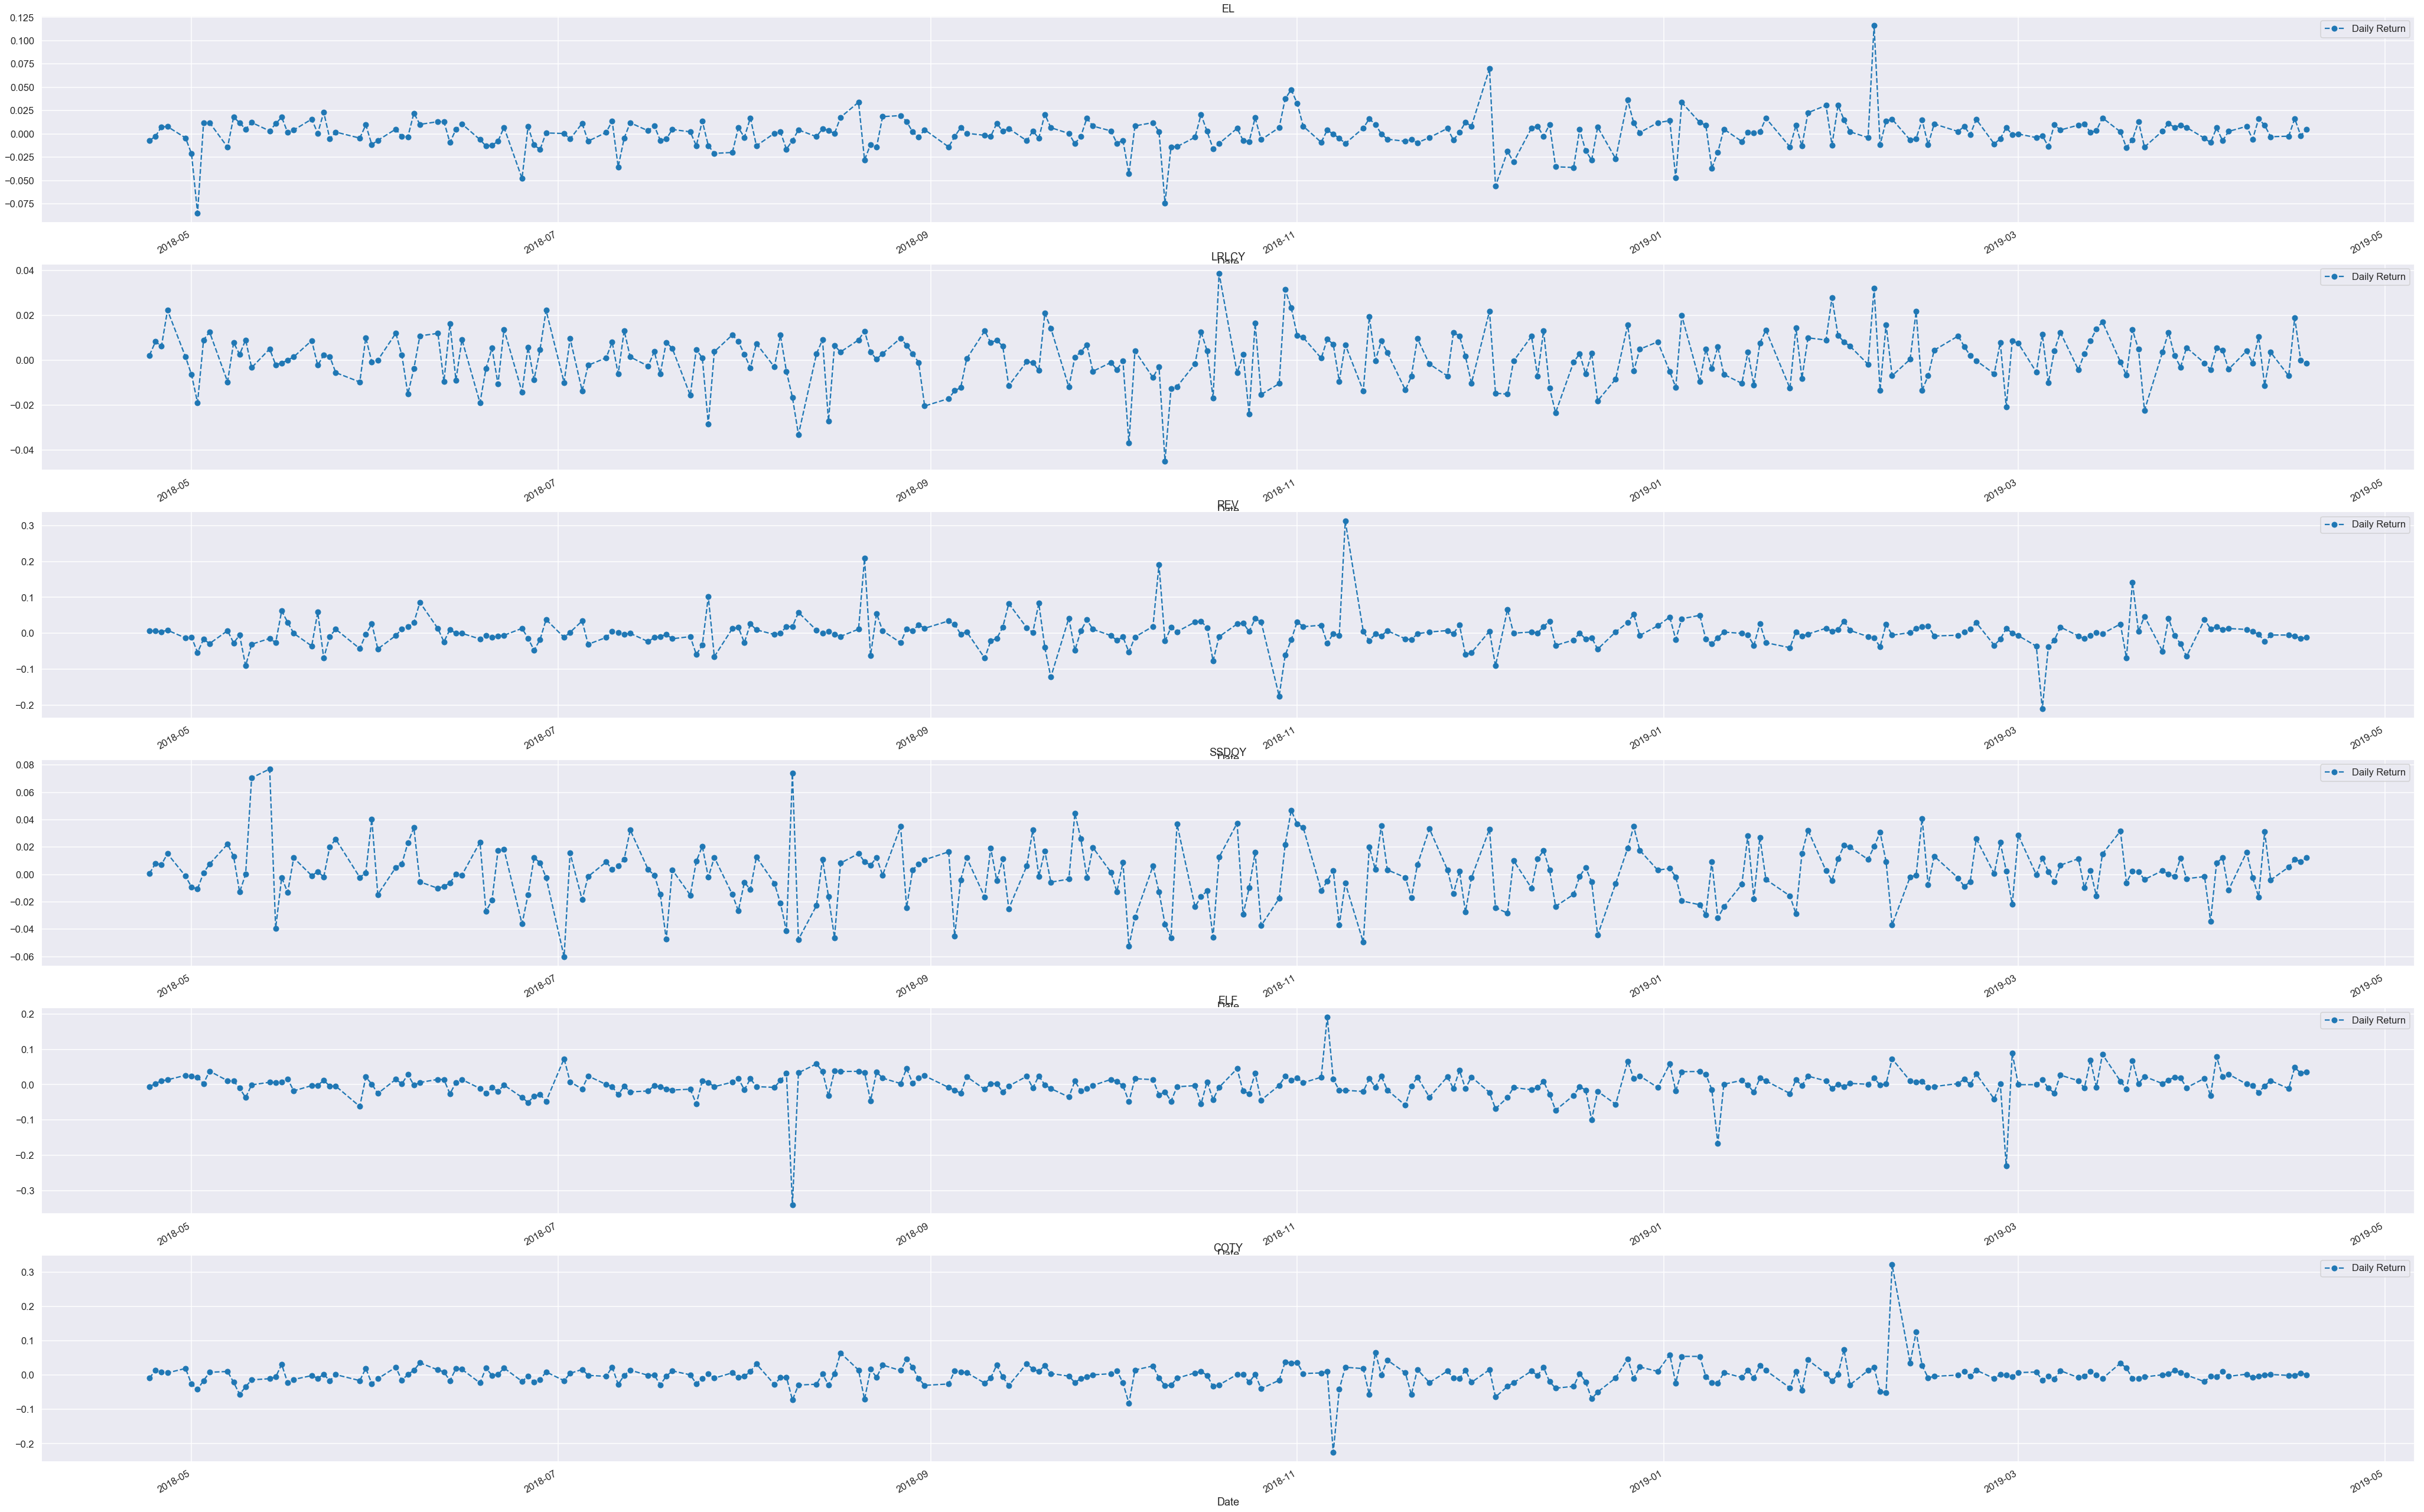

In [85]:
list_cosmetics = list(cosmetics.values())
fig = plt.figure()
for cos_df,num,sym in zip(list_cosmetics, range(1,7),cosmetics_symbol):
    ax = fig.add_subplot(6,1,num)
    cos_df['Daily Return'].plot(title=sym, ax=ax, legend=True,figsize=(72,50),linestyle='--',marker='o')

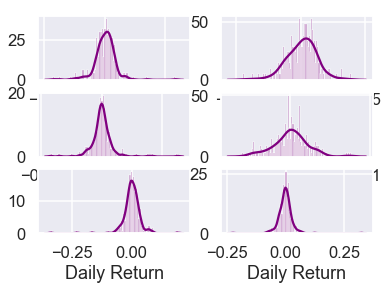

In [87]:

fig = plt.figure()
fig.ylim=(0,100)
for cos_df,num,sym in zip(list_cosmetics, range(1,7),cosmetics_symbol):
    ax = fig.add_subplot(3,2,num)
    sns.distplot(cos_df['Daily Return'].dropna(),bins=100,color='purple')


In [88]:
# Make a new tech returns DataFrame
closing_df = DataReader(cosmetics_symbol,'yahoo',start,end)['Adj Close']
cos_rets = closing_df.pct_change()

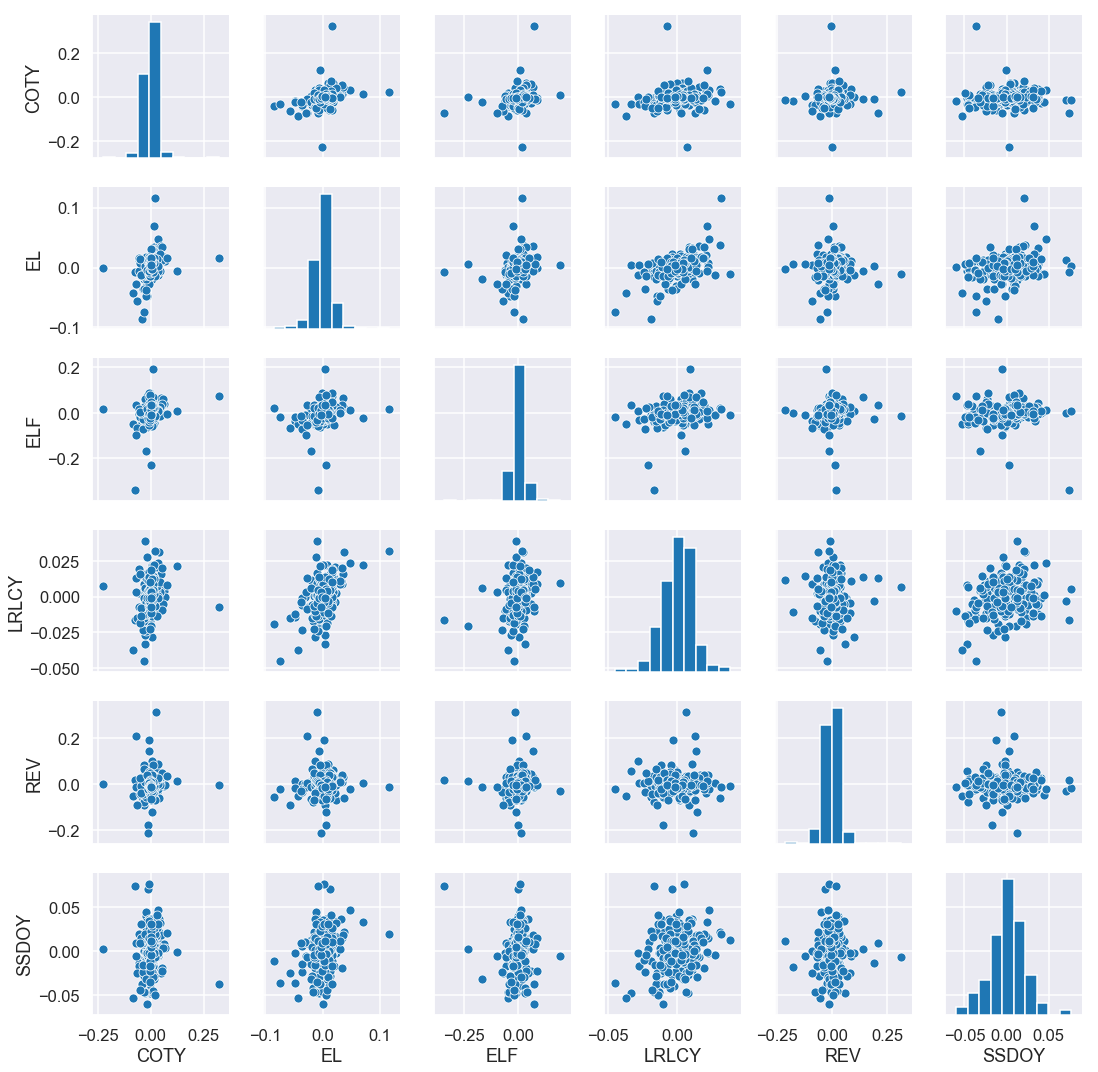

In [89]:
# visual analysis of all the comparisons of daily returns
sns.pairplot(cos_rets.dropna())

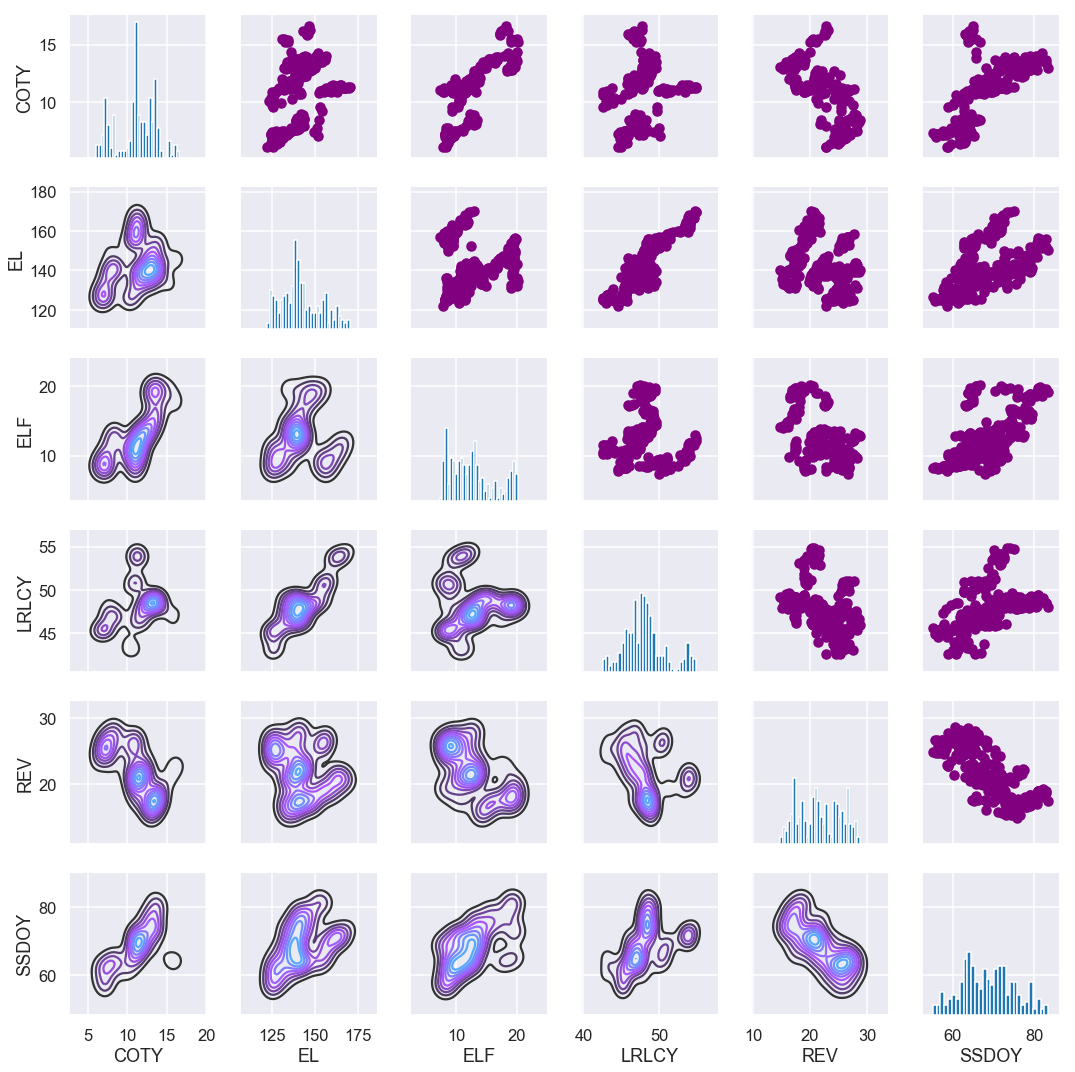

In [90]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

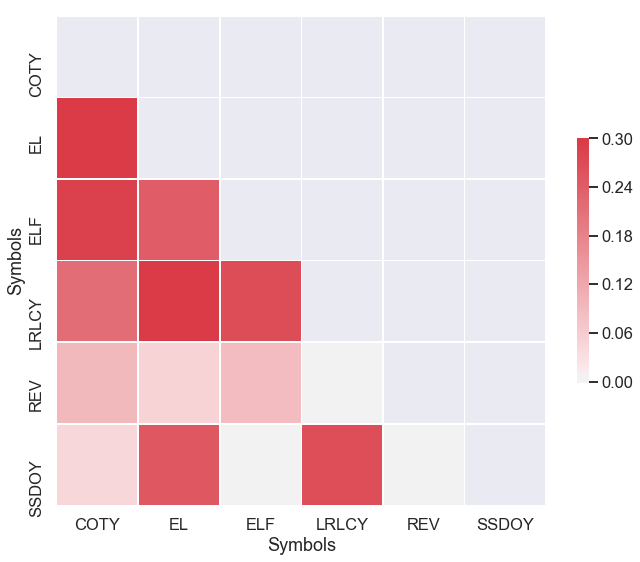

In [92]:
# Compute the correlation matrix
corr = cos_rets.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

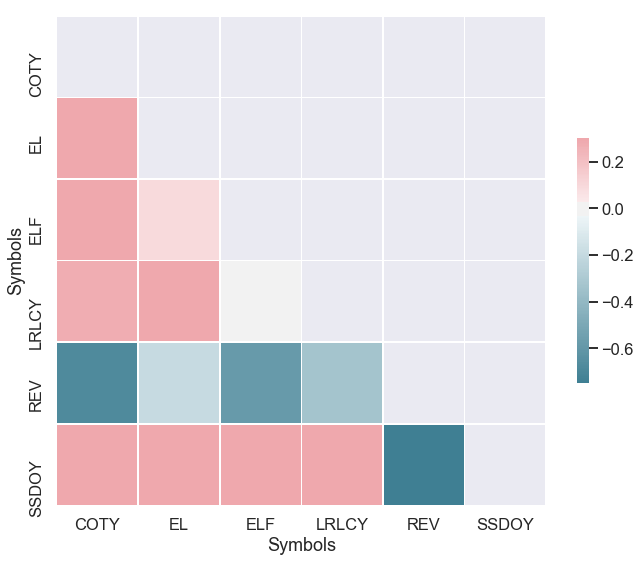

In [93]:
# Compute the correlation matrix
corr = closing_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

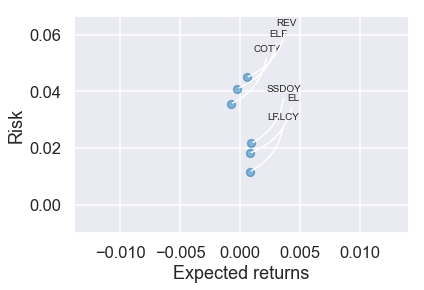

In [103]:

rets = cos_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


In [104]:
# The 0.05 empirical quantile of daily returns
rets[cosmetics_symbol].quantile(0.05)

Symbols
EL      -0.027458
LRLCY   -0.017722
REV     -0.060392
SSDOY   -0.037140
ELF     -0.047381
COTY    -0.043640
Name: 0.05, dtype: float64

In [110]:
rets.mean().values

array([-0.00078095,  0.00077536, -0.0002396 ,  0.0007775 ,  0.00053238,
        0.00092563])

In [111]:
days = 365
dt = 1/days

In [112]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, 
    days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [113]:
cosmetics['EL'].head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-04-23,149.529999,147.000000,149.350006,147.949997,1666800.0,146.321320,NaN,NaN,NaN,NaN
2018-04-24,149.889999,145.449997,148.750000,146.869995,2164700.0,145.253204,NaN,NaN,NaN,-0.007300
2018-04-25,146.869995,144.809998,146.570007,146.490005,2011600.0,144.877411,NaN,NaN,NaN,-0.002587
2018-04-26,148.350006,146.949997,147.210007,147.589996,1201100.0,145.965271,NaN,NaN,NaN,0.007509
2018-04-27,149.110001,147.059998,147.699997,148.740005,1326800.0,147.102631,NaN,NaN,NaN,0.007792


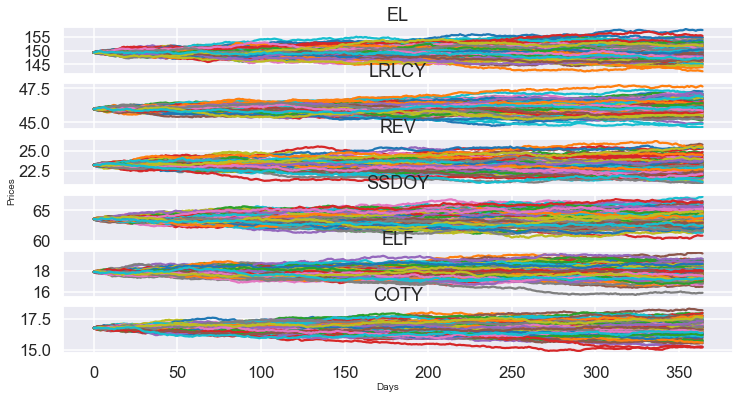

In [181]:

fig, axes = plt.subplots(nrows=6, ncols=1,figsize=(12, 6)) # two axes on figure
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.06, 0.5, 'Prices', va='center', rotation='vertical')

for sym,num in zip(cosmetics_symbol,range(6)):
    start_price = cosmetics[sym].iloc[0,2]
    # mu (drift) from the expected return data 
    mu = rets.mean()[sym]
    # the volatility of the stock from the std() of the average return
    sigma = rets.std()[sym]
    axes[num].set_title(sym)

    for run in range(100):
        axes[num].plot(stock_monte_carlo(start_price,days,mu,sigma))
        

    

In [186]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros((len(cosmetics_symbol),runs))

# Set the print options of numpy to only display 0-5 points from an array to suppress output
# np.set_printoptions(threshold=5)
for sym,num in zip(cosmetics_symbol,range(6)):
    start_price = cosmetics[sym].iloc[0,2]
    # mu (drift) from the expected return data 
    mu = rets.mean()[sym]
    # the volatility of the stock from the std() of the average return
    sigma = rets.std()[sym]
    axes[num].set_title(sym)
    for run in range(runs):    
        # Set the simulation data point as the last stock price for that run
        simulations[num,run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];



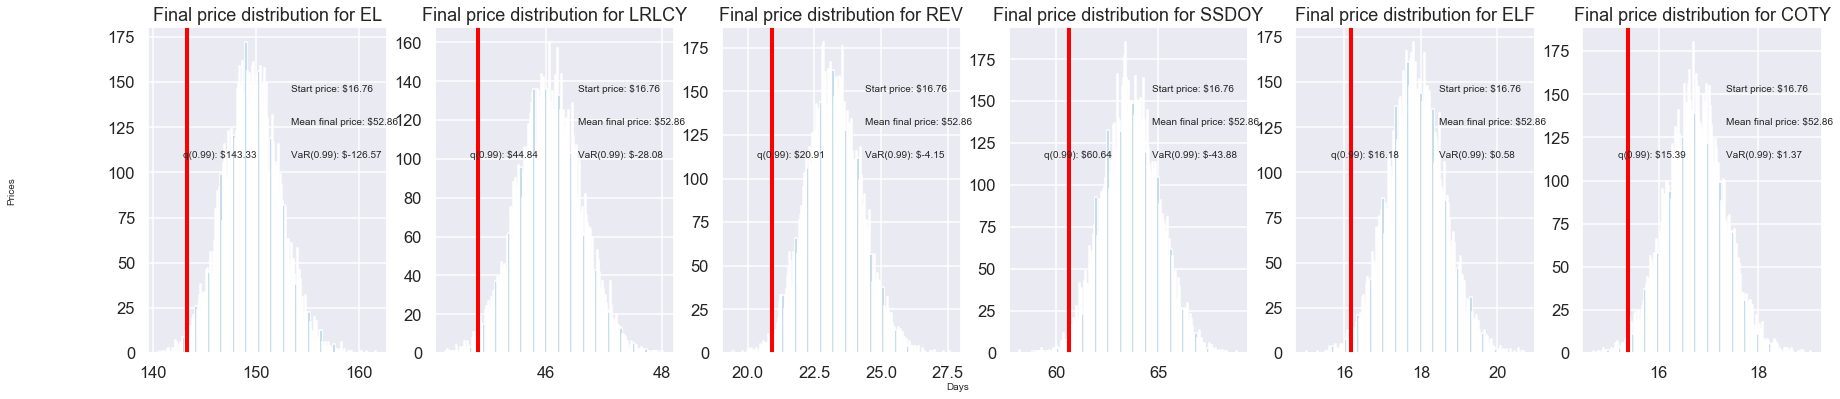

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(30, 6)) # two axes on figure
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.06, 0.5, 'Prices', va='center', rotation='vertical')

for sym,num in zip(cosmetics_symbol,range(6)):
    axes[num].set_title(sym)

    q = np.percentile(simulations[num], 1)
    axes[num].hist(simulations[num],bins=200)
    
   # Starting Price
    axes[num].annotate(s="Start price: $%.2f" %start_price, 
                       xy=(0.6, 0.8), xycoords="axes fraction")
   # Mean ending price
    axes[num].annotate(s="Mean final price: $%.2f" % simulations.mean(), 
                       xy=(0.6, 0.7), xycoords="axes fraction")
   # Variance of the price (within 99% confidence interval)
    axes[num].annotate(s="VaR(0.99): $%.2f" % (start_price - q,), 
                       xy=(0.6, 0.6), xycoords="axes fraction")
    # Display 1% quantile
    axes[num].annotate(s="q(0.99): $%.2f" % q, 
                       xy=(0.15, 0.6), xycoords="axes fraction")

#     Plot a line at the 1% quantile result
    axes[num].axvline(x=q, linewidth=4, color='r')
    
    # Title'{0} {1}, {2}'.format(Name, Test, Date)
    axes[num].set_title('Final price distribution for {}'.format(sym));